In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import nan

In [2]:
data = pd.read_csv("Telecom_customer churn.csv")
# copy_data = data.copy()
y = data['churn']
churn_and_id = data.drop(['churn', 'Customer_ID'], axis=1)

In [3]:
data

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [4]:
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [5]:
def missing_values_table(df):    
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        type_column = df.dtypes        
        mis_val_table = pd.concat([mis_val, mis_val_percent, type_column], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'type_column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
count_missing_values = data.isnull().sum()
count_missing_values

info_about_data = missing_values_table(data)
info_about_data

Your selected dataframe has 100 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values,type_column
numbcars,49366,49.4,float64
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
lor,30190,30.2,float64
income,25436,25.4,float64
adults,23019,23.0,float64
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object


In [6]:
# replace value numeric with mean 
for index, row in info_about_data.iterrows():
    if row['type_column'] != "object":        
        #print(row['Missing Values'],index, row['type_column'])
        # calculate mean
        mean_ =  data[index].mean()
        # copy_data[index] = copy_data[index].map({'nan': mean_})
        # copy_data_1[index].fillna(round(mean_))
        #print(copy_data_1[index])
        data[index].fillna(mean_, inplace=True)
        
        # copy_data_1[index].replace(to_replace=dict('NaN'=mean_), inplace=True)

        #print( round(mean_) )
        # replace mean with nan 
        # return 
info_about_data = missing_values_table(data)
info_about_data

Your selected dataframe has 100 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values,type_column
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object
prizm_social_one,7388,7.4,object
marital,1732,1.7,object
ethnic,1732,1.7,object
kid0_2,1732,1.7,object


In [7]:
def barplot(x_data, y_data, error_data = "", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

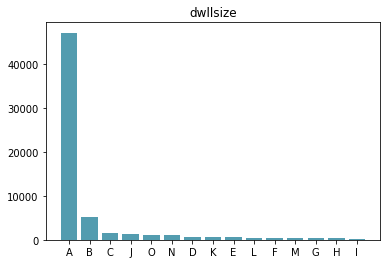

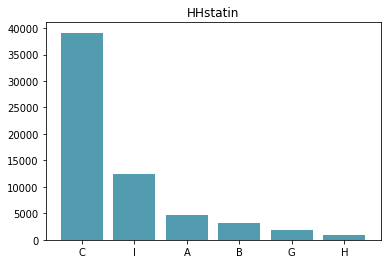

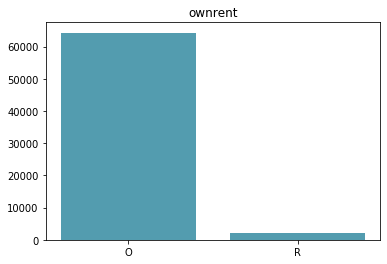

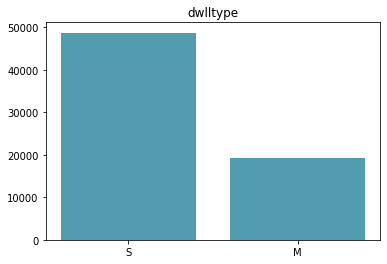

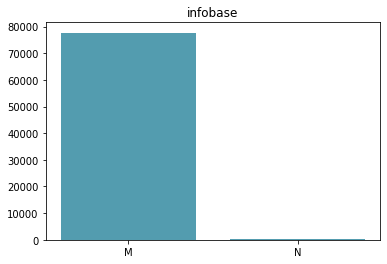

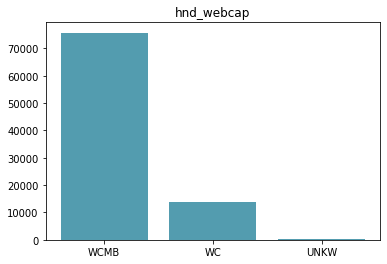

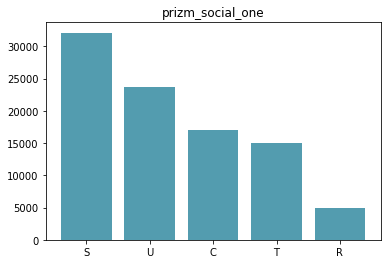

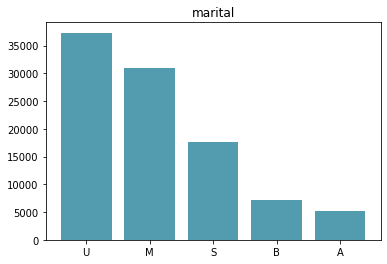

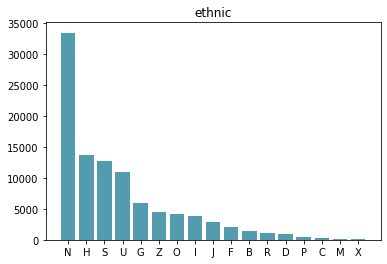

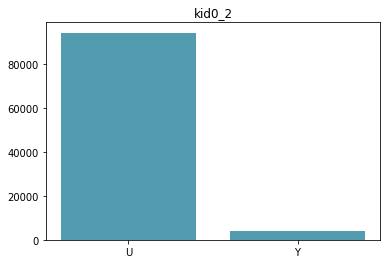

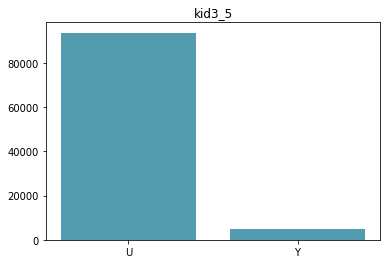

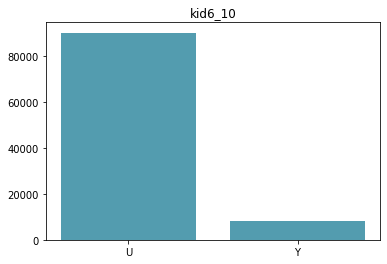

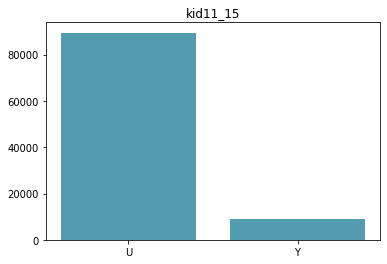

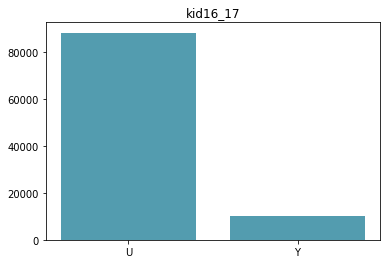

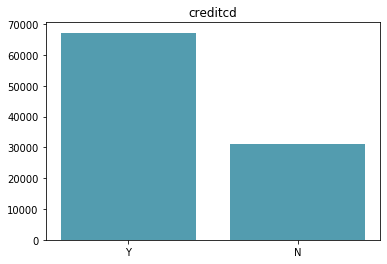

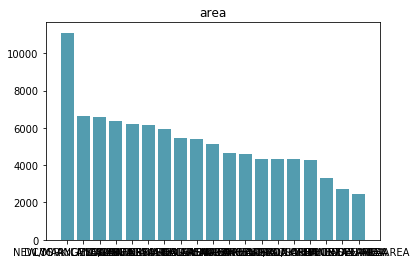

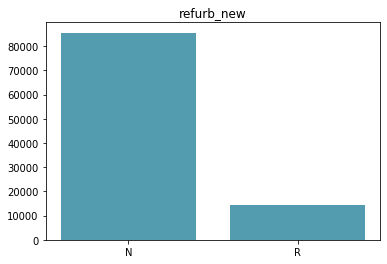

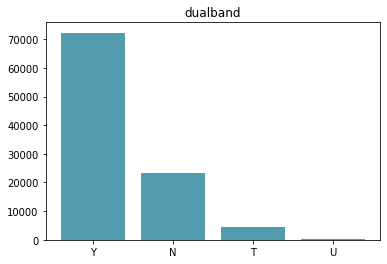

In [8]:


for i, row in info_about_data.iterrows():
    # print(i)
    feature = data[i].value_counts()
    barplot(feature.index, feature.values, x_label="", y_label="", title= i) 

#print(dwllsize.index)
#print(dwllsize.values)


In [9]:

def replace_missing_values(df, column, name_column):

    keys = df.key
    keys = keys.to_frame()    
    random_key = random.choice(keys['key'])
    print(keys )
    a = 0
    
    for i, value in column.iteritems():

        if value is np.nan and len(keys.key.value_counts()) > 0:
            print("Len : ===> ", len(keys.key.value_counts()))
            print("Random Key : ===> ", random_key)        
            curr_value = df.loc[df['key'] == str(random_key) ]['to_replace'].values[0]
            print("Curr value : ===> ", curr_value)
            if curr_value > 0:            
              
                df.set_value( df.key == random_key, 'to_replace', curr_value - 1)             
                data.set_value( data.index == i, name_column, random_key )

            else:            
                keys = keys[keys.key != random_key]
                print("Delete Key rest : ===> ", keys)

            random_key = random.choice(keys['key'])
            a = a + 1 
            print("A : ===> ", a)
            print('------------------------------')
   
    
def test(ch):
    print(ch)



for i, row in info_about_data.iterrows():
    
    column = data[row.name].value_counts() 
    info_column = {'key':  column.index,'value': column.values}
    df_info_column = pd.DataFrame (info_column, columns = ['key','value'])

    total_value = data[i].count()
    nb_missing = data.shape[0] - total_value 
    
    percentage = []
    value_to_replace = []
    
    for key, row in df_info_column.iterrows():
        per = round((row['value'] * 100 ) / total_value)
        percentage.append(per)

        to_replace =  round((per * nb_missing) / 100 ) 
        value_to_replace.append(to_replace)

    df_info_column['percentage'] = percentage
    df_info_column['to_replace'] = value_to_replace
    if  i != 'dwllsize':        
        replace_missing_values(df_info_column,data[i],i)
    #print( row.)
    # test( i )
    #break
    


  key
0   C
1   I
2   A
3   B
4   G
5   H
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23891.0
A : ===>  1
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23890.0
A : ===>  2
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7585.0
A : ===>  3
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7584.0
A : ===>  4
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1138.0
A : ===>  5
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  3034.0
A : ===>  6
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  3033.0
A : ===>  7
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1137.0
A : ===>  8
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7583.0
A : ===>  9
------------------------------
Len : ===>  6
Random

/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


 1895.0
A : ===>  21
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7578.0
A : ===>  22
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1133.0
A : ===>  23
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1132.0
A : ===>  24
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1131.0
A : ===>  25
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  3032.0
A : ===>  26
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1894.0
A : ===>  27
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  3031.0
A : ===>  28
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23889.0
A : ===>  29
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1893.0
A : ===>  30
------------------------------
Le

A : ===>  103
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1121.0
A : ===>  104
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1120.0
A : ===>  105
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23877.0
A : ===>  106
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23876.0
A : ===>  107
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7557.0
A : ===>  108
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23875.0
A : ===>  109
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  369.0
A : ===>  110
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23874.0
A : ===>  111
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  368.0
A : ===>  112
------------------------------

A : ===>  186
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7546.0
A : ===>  187
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1862.0
A : ===>  188
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23861.0
A : ===>  189
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  3005.0
A : ===>  190
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1108.0
A : ===>  191
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  355.0
A : ===>  192
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7545.0
A : ===>  193
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  354.0
A : ===>  194
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  353.0
A : ===>  195
------------------------------
Len

A : ===>  266
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23850.0
A : ===>  267
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  343.0
A : ===>  268
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2985.0
A : ===>  269
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1093.0
A : ===>  270
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1092.0
A : ===>  271
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2984.0
A : ===>  272
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  342.0
A : ===>  273
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23849.0
A : ===>  274
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23848.0
A : ===>  275
------------------------------


Len : ===>  6
Random Key : ===>  H
Curr value : ===>  335.0
A : ===>  344
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23834.0
A : ===>  345
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1076.0
A : ===>  346
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7520.0
A : ===>  347
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1075.0
A : ===>  348
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  334.0
A : ===>  349
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1839.0
A : ===>  350
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1838.0
A : ===>  351
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1837.0
A : ===>  352
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value :

A : ===>  428
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  317.0
A : ===>  429
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23819.0
A : ===>  430
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2969.0
A : ===>  431
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  316.0
A : ===>  432
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1821.0
A : ===>  433
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2968.0
A : ===>  434
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23818.0
A : ===>  435
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7505.0
A : ===>  436
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23817.0
A : ===>  437
------------------------------


A : ===>  530
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1054.0
A : ===>  531
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2950.0
A : ===>  532
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7496.0
A : ===>  533
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23794.0
A : ===>  534
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1804.0
A : ===>  535
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7495.0
A : ===>  536
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23793.0
A : ===>  537
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1053.0
A : ===>  538
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2949.0
A : ===>  539
------------------------------

A : ===>  617
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2941.0
A : ===>  618
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2940.0
A : ===>  619
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  283.0
A : ===>  620
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1785.0
A : ===>  621
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  282.0
A : ===>  622
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2939.0
A : ===>  623
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7482.0
A : ===>  624
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  281.0
A : ===>  625
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1784.0
A : ===>  626
------------------------------
Len 

A : ===>  702
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1019.0
A : ===>  703
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7469.0
A : ===>  704
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7468.0
A : ===>  705
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2931.0
A : ===>  706
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7467.0
A : ===>  707
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  269.0
A : ===>  708
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23769.0
A : ===>  709
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  268.0
A : ===>  710
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1764.0
A : ===>  711
------------------------------
Le

A : ===>  781
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2918.0
A : ===>  782
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  1005.0
A : ===>  783
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1754.0
A : ===>  784
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1753.0
A : ===>  785
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23756.0
A : ===>  786
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2917.0
A : ===>  787
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  255.0
A : ===>  788
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1752.0
A : ===>  789
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1751.0
A : ===>  790
------------------------------
L

Len : ===>  6
Random Key : ===>  H
Curr value : ===>  242.0
A : ===>  866
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7447.0
A : ===>  867
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2897.0
A : ===>  868
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1732.0
A : ===>  869
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2896.0
A : ===>  870
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23745.0
A : ===>  871
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  995.0
A : ===>  872
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2895.0
A : ===>  873
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  241.0
A : ===>  874
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : 

A : ===>  950
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1717.0
A : ===>  951
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  976.0
A : ===>  952
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  224.0
A : ===>  953
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  223.0
A : ===>  954
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7439.0
A : ===>  955
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23734.0
A : ===>  956
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7438.0
A : ===>  957
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7437.0
A : ===>  958
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7436.0
A : ===>  959
------------------------------
Len

A : ===>  1040
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  210.0
A : ===>  1041
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2867.0
A : ===>  1042
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2866.0
A : ===>  1043
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23724.0
A : ===>  1044
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23723.0
A : ===>  1045
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1699.0
A : ===>  1046
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  961.0
A : ===>  1047
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1698.0
A : ===>  1048
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7422.0
A : ===>  1049
----------------------

A : ===>  1119
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7409.0
A : ===>  1120
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  947.0
A : ===>  1121
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1683.0
A : ===>  1122
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  203.0
A : ===>  1123
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1682.0
A : ===>  1124
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2850.0
A : ===>  1125
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7408.0
A : ===>  1126
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1681.0
A : ===>  1127
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23712.0
A : ===>  1128
-----------------------

A : ===>  1212
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2834.0
A : ===>  1213
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7392.0
A : ===>  1214
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7391.0
A : ===>  1215
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2833.0
A : ===>  1216
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23700.0
A : ===>  1217
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2832.0
A : ===>  1218
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23699.0
A : ===>  1219
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23698.0
A : ===>  1220
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  186.0
A : ===>  1221
--------------------

A : ===>  1291
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2815.0
A : ===>  1292
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  167.0
A : ===>  1293
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1657.0
A : ===>  1294
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1656.0
A : ===>  1295
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  925.0
A : ===>  1296
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  166.0
A : ===>  1297
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1655.0
A : ===>  1298
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2814.0
A : ===>  1299
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7383.0
A : ===>  1300
-------------------------

A : ===>  1370
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23676.0
A : ===>  1371
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  912.0
A : ===>  1372
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7367.0
A : ===>  1373
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2804.0
A : ===>  1374
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  911.0
A : ===>  1375
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  910.0
A : ===>  1376
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1642.0
A : ===>  1377
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7366.0
A : ===>  1378
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  152.0
A : ===>  1379
-------------------------

A : ===>  1465
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  899.0
A : ===>  1466
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  898.0
A : ===>  1467
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1624.0
A : ===>  1468
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  897.0
A : ===>  1469
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2792.0
A : ===>  1470
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7346.0
A : ===>  1471
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7345.0
A : ===>  1472
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2791.0
A : ===>  1473
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  136.0
A : ===>  1474
--------------------------

A : ===>  1565
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2775.0
A : ===>  1566
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7332.0
A : ===>  1567
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7331.0
A : ===>  1568
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23638.0
A : ===>  1569
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  882.0
A : ===>  1570
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2774.0
A : ===>  1571
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23637.0
A : ===>  1572
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  123.0
A : ===>  1573
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2773.0
A : ===>  1574
----------------------

A : ===>  1642
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1600.0
A : ===>  1643
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2760.0
A : ===>  1644
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  864.0
A : ===>  1645
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  108.0
A : ===>  1646
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1599.0
A : ===>  1647
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2759.0
A : ===>  1648
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7319.0
A : ===>  1649
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2758.0
A : ===>  1650
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  863.0
A : ===>  1651
-------------------------

A : ===>  1726
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7302.0
A : ===>  1727
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7301.0
A : ===>  1728
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7300.0
A : ===>  1729
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  99.0
A : ===>  1730
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  849.0
A : ===>  1731
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23620.0
A : ===>  1732
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1590.0
A : ===>  1733
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7299.0
A : ===>  1734
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  98.0
A : ===>  1735
--------------------------

Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2724.0
A : ===>  1809
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2723.0
A : ===>  1810
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2722.0
A : ===>  1811
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  83.0
A : ===>  1812
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2721.0
A : ===>  1813
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2720.0
A : ===>  1814
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  834.0
A : ===>  1815
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7289.0
A : ===>  1816
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23611.0
A : ===>  1817
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr

A : ===>  1909
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  814.0
A : ===>  1910
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2699.0
A : ===>  1911
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23599.0
A : ===>  1912
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2698.0
A : ===>  1913
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7282.0
A : ===>  1914
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1556.0
A : ===>  1915
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2697.0
A : ===>  1916
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7281.0
A : ===>  1917
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  813.0
A : ===>  1918
-----------------------

A : ===>  1986
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1542.0
A : ===>  1987
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1541.0
A : ===>  1988
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1540.0
A : ===>  1989
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  53.0
A : ===>  1990
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2681.0
A : ===>  1991
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23584.0
A : ===>  1992
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1539.0
A : ===>  1993
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2680.0
A : ===>  1994
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7273.0
A : ===>  1995
-----------------------

A : ===>  2068
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  793.0
A : ===>  2069
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  792.0
A : ===>  2070
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7259.0
A : ===>  2071
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2667.0
A : ===>  2072
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1524.0
A : ===>  2073
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1523.0
A : ===>  2074
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2666.0
A : ===>  2075
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  39.0
A : ===>  2076
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7258.0
A : ===>  2077
--------------------------

A : ===>  2151
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7235.0
A : ===>  2152
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2651.0
A : ===>  2153
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7234.0
A : ===>  2154
------------------------------
Len : ===>  6
Random Key : ===>  I
Curr value : ===>  7233.0
A : ===>  2155
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  781.0
A : ===>  2156
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23570.0
A : ===>  2157
------------------------------
Len : ===>  6
Random Key : ===>  G
Curr value : ===>  780.0
A : ===>  2158
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  24.0
A : ===>  2159
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1511.0
A : ===>  2160
-------------------------

Len : ===>  6
Random Key : ===>  G
Curr value : ===>  768.0
A : ===>  2238
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2632.0
A : ===>  2239
------------------------------
Len : ===>  6
Random Key : ===>  H
Curr value : ===>  5.0
A : ===>  2240
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2631.0
A : ===>  2241
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1501.0
A : ===>  2242
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2630.0
A : ===>  2243
------------------------------
Len : ===>  6
Random Key : ===>  C
Curr value : ===>  23559.0
A : ===>  2244
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr value : ===>  1500.0
A : ===>  2245
------------------------------
Len : ===>  6
Random Key : ===>  A
Curr value : ===>  2629.0
A : ===>  2246
------------------------------
Len : ===>  6
Random Key : ===>  B
Curr 

Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7207.0
A : ===>  2321
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7206.0
A : ===>  2322
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  751.0
A : ===>  2323
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23542.0
A : ===>  2324
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2618.0
A : ===>  2325
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7205.0
A : ===>  2326
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  750.0
A : ===>  2327
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23541.0
A : ===>  2328
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2617.0
A : ===>  2329
------------------------------
Len : ===>  5
Random Key : ===>  A
Cu

A : ===>  2404
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2601.0
A : ===>  2405
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  730.0
A : ===>  2406
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23529.0
A : ===>  2407
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23528.0
A : ===>  2408
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2600.0
A : ===>  2409
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7190.0
A : ===>  2410
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2599.0
A : ===>  2411
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  729.0
A : ===>  2412
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23527.0
A : ===>  2413
---------------------

Curr value : ===>  715.0
A : ===>  2486
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7171.0
A : ===>  2487
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  714.0
A : ===>  2488
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1453.0
A : ===>  2489
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2589.0
A : ===>  2490
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1452.0
A : ===>  2491
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1451.0
A : ===>  2492
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2588.0
A : ===>  2493
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2587.0
A : ===>  2494
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  713.0
A : ===>  2495

Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23496.0
A : ===>  2567
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2572.0
A : ===>  2568
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2571.0
A : ===>  2569
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1438.0
A : ===>  2570
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1437.0
A : ===>  2571
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2570.0
A : ===>  2572
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1436.0
A : ===>  2573
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  695.0
A : ===>  2574
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7157.0
A : ===>  2575
------------------------------
Len : ===>  5
Random Key : ===>  B
Cu

A : ===>  2650
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2554.0
A : ===>  2651
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23477.0
A : ===>  2652
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2553.0
A : ===>  2653
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  685.0
A : ===>  2654
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  684.0
A : ===>  2655
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7141.0
A : ===>  2656
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  683.0
A : ===>  2657
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  682.0
A : ===>  2658
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2552.0
A : ===>  2659
-------------------------

A : ===>  2735
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23457.0
A : ===>  2736
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2537.0
A : ===>  2737
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1405.0
A : ===>  2738
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2536.0
A : ===>  2739
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23456.0
A : ===>  2740
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1404.0
A : ===>  2741
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  667.0
A : ===>  2742
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1403.0
A : ===>  2743
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  666.0
A : ===>  2744
----------------------

A : ===>  2821
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2517.0
A : ===>  2822
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2516.0
A : ===>  2823
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1392.0
A : ===>  2824
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23436.0
A : ===>  2825
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23435.0
A : ===>  2826
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  648.0
A : ===>  2827
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  647.0
A : ===>  2828
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23434.0
A : ===>  2829
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1391.0
A : ===>  2830
---------------------

A : ===>  2906
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23423.0
A : ===>  2907
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1381.0
A : ===>  2908
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  625.0
A : ===>  2909
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1380.0
A : ===>  2910
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23422.0
A : ===>  2911
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2496.0
A : ===>  2912
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  624.0
A : ===>  2913
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1379.0
A : ===>  2914
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23421.0
A : ===>  2915
---------------------

Curr value : ===>  2482.0
A : ===>  2991
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7075.0
A : ===>  2992
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2481.0
A : ===>  2993
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1362.0
A : ===>  2994
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  614.0
A : ===>  2995
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1361.0
A : ===>  2996
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1360.0
A : ===>  2997
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7074.0
A : ===>  2998
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23401.0
A : ===>  2999
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23400.0
A : ===>  

A : ===>  3070
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1344.0
A : ===>  3071
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1343.0
A : ===>  3072
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7059.0
A : ===>  3073
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2465.0
A : ===>  3074
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1342.0
A : ===>  3075
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7058.0
A : ===>  3076
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  600.0
A : ===>  3077
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7057.0
A : ===>  3078
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1341.0
A : ===>  3079
-----------------------

A : ===>  3153
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1325.0
A : ===>  3154
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1324.0
A : ===>  3155
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7044.0
A : ===>  3156
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2452.0
A : ===>  3157
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  580.0
A : ===>  3158
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23370.0
A : ===>  3159
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23369.0
A : ===>  3160
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1323.0
A : ===>  3161
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23368.0
A : ===>  3162
--------------------

A : ===>  3238
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1306.0
A : ===>  3239
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7023.0
A : ===>  3240
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1305.0
A : ===>  3241
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7022.0
A : ===>  3242
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2439.0
A : ===>  3243
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23354.0
A : ===>  3244
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  564.0
A : ===>  3245
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7021.0
A : ===>  3246
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23353.0
A : ===>  3247
---------------------

A : ===>  3325
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  549.0
A : ===>  3326
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2425.0
A : ===>  3327
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7002.0
A : ===>  3328
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2424.0
A : ===>  3329
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2423.0
A : ===>  3330
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  7001.0
A : ===>  3331
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23333.0
A : ===>  3332
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2422.0
A : ===>  3333
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2421.0
A : ===>  3334
----------------------

A : ===>  3409
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6985.0
A : ===>  3410
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23317.0
A : ===>  3411
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6984.0
A : ===>  3412
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2404.0
A : ===>  3413
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1278.0
A : ===>  3414
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6983.0
A : ===>  3415
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6982.0
A : ===>  3416
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2403.0
A : ===>  3417
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6981.0
A : ===>  3418
---------------------

A : ===>  3495
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6963.0
A : ===>  3496
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  514.0
A : ===>  3497
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2389.0
A : ===>  3498
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  513.0
A : ===>  3499
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6962.0
A : ===>  3500
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  512.0
A : ===>  3501
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6961.0
A : ===>  3502
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1260.0
A : ===>  3503
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23303.0
A : ===>  3504
------------------------

A : ===>  3581
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23290.0
A : ===>  3582
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1243.0
A : ===>  3583
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2371.0
A : ===>  3584
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6941.0
A : ===>  3585
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6940.0
A : ===>  3586
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1242.0
A : ===>  3587
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1241.0
A : ===>  3588
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  498.0
A : ===>  3589
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23289.0
A : ===>  3590
---------------------

A : ===>  3664
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  478.0
A : ===>  3665
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23280.0
A : ===>  3666
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2348.0
A : ===>  3667
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  477.0
A : ===>  3668
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  476.0
A : ===>  3669
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6927.0
A : ===>  3670
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6926.0
A : ===>  3671
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1227.0
A : ===>  3672
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1226.0
A : ===>  3673
------------------------

A : ===>  3749
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  461.0
A : ===>  3750
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1210.0
A : ===>  3751
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  460.0
A : ===>  3752
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6908.0
A : ===>  3753
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  459.0
A : ===>  3754
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2332.0
A : ===>  3755
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23264.0
A : ===>  3756
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  458.0
A : ===>  3757
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23263.0
A : ===>  3758
------------------------

A : ===>  3833
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23246.0
A : ===>  3834
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  445.0
A : ===>  3835
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23245.0
A : ===>  3836
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23244.0
A : ===>  3837
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6893.0
A : ===>  3838
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  444.0
A : ===>  3839
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23243.0
A : ===>  3840
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6892.0
A : ===>  3841
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1197.0
A : ===>  3842
--------------------

A : ===>  3915
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2298.0
A : ===>  3916
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  429.0
A : ===>  3917
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2297.0
A : ===>  3918
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  428.0
A : ===>  3919
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  427.0
A : ===>  3920
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  426.0
A : ===>  3921
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1177.0
A : ===>  3922
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23228.0
A : ===>  3923
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23227.0
A : ===>  3924
------------------------

A : ===>  3995
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1166.0
A : ===>  3996
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23211.0
A : ===>  3997
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  410.0
A : ===>  3998
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2281.0
A : ===>  3999
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1165.0
A : ===>  4000
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  409.0
A : ===>  4001
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23210.0
A : ===>  4002
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23209.0
A : ===>  4003
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23208.0
A : ===>  4004
--------------------

A : ===>  4079
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2260.0
A : ===>  4080
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23193.0
A : ===>  4081
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  395.0
A : ===>  4082
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6849.0
A : ===>  4083
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1148.0
A : ===>  4084
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2259.0
A : ===>  4085
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  394.0
A : ===>  4086
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6848.0
A : ===>  4087
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6847.0
A : ===>  4088
-----------------------

A : ===>  4164
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1139.0
A : ===>  4165
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23173.0
A : ===>  4166
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6830.0
A : ===>  4167
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2246.0
A : ===>  4168
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  372.0
A : ===>  4169
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23172.0
A : ===>  4170
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  371.0
A : ===>  4171
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1138.0
A : ===>  4172
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1137.0
A : ===>  4173
----------------------

A : ===>  4249
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6813.0
A : ===>  4250
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  360.0
A : ===>  4251
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  359.0
A : ===>  4252
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2226.0
A : ===>  4253
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2225.0
A : ===>  4254
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  358.0
A : ===>  4255
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6812.0
A : ===>  4256
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23157.0
A : ===>  4257
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23156.0
A : ===>  4258
-----------------------

A : ===>  4333
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  341.0
A : ===>  4334
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23137.0
A : ===>  4335
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2214.0
A : ===>  4336
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23136.0
A : ===>  4337
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23135.0
A : ===>  4338
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  340.0
A : ===>  4339
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1102.0
A : ===>  4340
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23134.0
A : ===>  4341
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2213.0
A : ===>  4342
--------------------

A : ===>  4419
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1089.0
A : ===>  4420
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6785.0
A : ===>  4421
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23118.0
A : ===>  4422
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1088.0
A : ===>  4423
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23117.0
A : ===>  4424
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6784.0
A : ===>  4425
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6783.0
A : ===>  4426
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23116.0
A : ===>  4427
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6782.0
A : ===>  4428
-------------------

A : ===>  4504
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6769.0
A : ===>  4505
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23104.0
A : ===>  4506
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23103.0
A : ===>  4507
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2176.0
A : ===>  4508
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6768.0
A : ===>  4509
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23102.0
A : ===>  4510
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23101.0
A : ===>  4511
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  296.0
A : ===>  4512
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23100.0
A : ===>  4513
------------------

A : ===>  4589
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1058.0
A : ===>  4590
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1057.0
A : ===>  4591
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1056.0
A : ===>  4592
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6747.0
A : ===>  4593
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  277.0
A : ===>  4594
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6746.0
A : ===>  4595
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  276.0
A : ===>  4596
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1055.0
A : ===>  4597
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1054.0
A : ===>  4598
------------------------

Len : ===>  5
Random Key : ===>  G
Curr value : ===>  260.0
A : ===>  4673
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1038.0
A : ===>  4674
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1037.0
A : ===>  4675
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2146.0
A : ===>  4676
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1036.0
A : ===>  4677
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2145.0
A : ===>  4678
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  259.0
A : ===>  4679
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2144.0
A : ===>  4680
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23074.0
A : ===>  4681
------------------------------
Len : ===>  5
Random Key : ===>  A
Cur

A : ===>  4756
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  242.0
A : ===>  4757
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1019.0
A : ===>  4758
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1018.0
A : ===>  4759
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1017.0
A : ===>  4760
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  241.0
A : ===>  4761
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1016.0
A : ===>  4762
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  240.0
A : ===>  4763
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  1015.0
A : ===>  4764
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6721.0
A : ===>  4765
-------------------------

A : ===>  4837
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2114.0
A : ===>  4838
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  222.0
A : ===>  4839
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23043.0
A : ===>  4840
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23042.0
A : ===>  4841
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6710.0
A : ===>  4842
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6709.0
A : ===>  4843
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6708.0
A : ===>  4844
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23041.0
A : ===>  4845
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2113.0
A : ===>  4846
--------------------

A : ===>  4943
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23025.0
A : ===>  4944
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2091.0
A : ===>  4945
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23024.0
A : ===>  4946
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23023.0
A : ===>  4947
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2090.0
A : ===>  4948
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2089.0
A : ===>  4949
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  200.0
A : ===>  4950
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6693.0
A : ===>  4951
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  972.0
A : ===>  4952
---------------------

A : ===>  5023
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23013.0
A : ===>  5024
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  958.0
A : ===>  5025
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  181.0
A : ===>  5026
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23012.0
A : ===>  5027
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23011.0
A : ===>  5028
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23010.0
A : ===>  5029
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  180.0
A : ===>  5030
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6674.0
A : ===>  5031
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  23009.0
A : ===>  5032
--------------------

Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6653.0
A : ===>  5108
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  166.0
A : ===>  5109
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  943.0
A : ===>  5110
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  165.0
A : ===>  5111
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  164.0
A : ===>  5112
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6652.0
A : ===>  5113
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2061.0
A : ===>  5114
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  163.0
A : ===>  5115
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  162.0
A : ===>  5116
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr val

A : ===>  5193
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  148.0
A : ===>  5194
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22980.0
A : ===>  5195
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  927.0
A : ===>  5196
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  926.0
A : ===>  5197
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  925.0
A : ===>  5198
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6629.0
A : ===>  5199
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  147.0
A : ===>  5200
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  924.0
A : ===>  5201
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  146.0
A : ===>  5202
----------------------------

A : ===>  5278
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6613.0
A : ===>  5279
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22967.0
A : ===>  5280
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6612.0
A : ===>  5281
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  131.0
A : ===>  5282
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2032.0
A : ===>  5283
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  130.0
A : ===>  5284
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2031.0
A : ===>  5285
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6611.0
A : ===>  5286
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22966.0
A : ===>  5287
----------------------

A : ===>  5363
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  113.0
A : ===>  5364
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22953.0
A : ===>  5365
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2010.0
A : ===>  5366
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6599.0
A : ===>  5367
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  886.0
A : ===>  5368
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6598.0
A : ===>  5369
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2009.0
A : ===>  5370
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  112.0
A : ===>  5371
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  2008.0
A : ===>  5372
------------------------

A : ===>  5449
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6582.0
A : ===>  5450
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22934.0
A : ===>  5451
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  872.0
A : ===>  5452
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1993.0
A : ===>  5453
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1992.0
A : ===>  5454
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22933.0
A : ===>  5455
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  94.0
A : ===>  5456
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6581.0
A : ===>  5457
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22932.0
A : ===>  5458
----------------------

A : ===>  5536
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6563.0
A : ===>  5537
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1976.0
A : ===>  5538
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22915.0
A : ===>  5539
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6562.0
A : ===>  5540
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  859.0
A : ===>  5541
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6561.0
A : ===>  5542
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6560.0
A : ===>  5543
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  858.0
A : ===>  5544
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  75.0
A : ===>  5545
-------------------------

A : ===>  5620
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22895.0
A : ===>  5621
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1960.0
A : ===>  5622
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22894.0
A : ===>  5623
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6544.0
A : ===>  5624
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  843.0
A : ===>  5625
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1959.0
A : ===>  5626
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  62.0
A : ===>  5627
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6543.0
A : ===>  5628
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  61.0
A : ===>  5629
-------------------------

Len : ===>  5
Random Key : ===>  G
Curr value : ===>  46.0
A : ===>  5703
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  45.0
A : ===>  5704
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  829.0
A : ===>  5705
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6532.0
A : ===>  5706
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1944.0
A : ===>  5707
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  828.0
A : ===>  5708
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22871.0
A : ===>  5709
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6531.0
A : ===>  5710
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6530.0
A : ===>  5711
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr va

A : ===>  5785
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  812.0
A : ===>  5786
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22855.0
A : ===>  5787
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1929.0
A : ===>  5788
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6514.0
A : ===>  5789
------------------------------
Len : ===>  5
Random Key : ===>  A
Curr value : ===>  1928.0
A : ===>  5790
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22854.0
A : ===>  5791
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6513.0
A : ===>  5792
------------------------------
Len : ===>  5
Random Key : ===>  G
Curr value : ===>  29.0
A : ===>  5793
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  811.0
A : ===>  5794
------------------------

Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6495.0
A : ===>  5871
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  795.0
A : ===>  5872
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22837.0
A : ===>  5873
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6494.0
A : ===>  5874
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22836.0
A : ===>  5875
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  794.0
A : ===>  5876
------------------------------
Len : ===>  5
Random Key : ===>  I
Curr value : ===>  6493.0
A : ===>  5877
------------------------------
Len : ===>  5
Random Key : ===>  C
Curr value : ===>  22835.0
A : ===>  5878
------------------------------
Len : ===>  5
Random Key : ===>  B
Curr value : ===>  793.0
A : ===>  5879
------------------------------
Len : ===>  5
Random Key : ===>  B
Cu

A : ===>  5954
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1901.0
A : ===>  5955
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  777.0
A : ===>  5956
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  776.0
A : ===>  5957
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6473.0
A : ===>  5958
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  775.0
A : ===>  5959
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22820.0
A : ===>  5960
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1900.0
A : ===>  5961
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22819.0
A : ===>  5962
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  774.0
A : ===>  5963
------------------------

A : ===>  6040
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22805.0
A : ===>  6041
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22804.0
A : ===>  6042
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1882.0
A : ===>  6043
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22803.0
A : ===>  6044
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22802.0
A : ===>  6045
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22801.0
A : ===>  6046
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6445.0
A : ===>  6047
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  753.0
A : ===>  6048
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22800.0
A : ===>  6049
-----------------

A : ===>  6126
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1853.0
A : ===>  6127
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  733.0
A : ===>  6128
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  732.0
A : ===>  6129
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6430.0
A : ===>  6130
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  731.0
A : ===>  6131
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6429.0
A : ===>  6132
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6428.0
A : ===>  6133
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6427.0
A : ===>  6134
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  730.0
A : ===>  6135
--------------------------

A : ===>  6212
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22754.0
A : ===>  6213
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6415.0
A : ===>  6214
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6414.0
A : ===>  6215
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6413.0
A : ===>  6216
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22753.0
A : ===>  6217
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1830.0
A : ===>  6218
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6412.0
A : ===>  6219
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  714.0
A : ===>  6220
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1829.0
A : ===>  6221
---------------------

A : ===>  6296
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1809.0
A : ===>  6297
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1808.0
A : ===>  6298
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22733.0
A : ===>  6299
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  692.0
A : ===>  6300
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22732.0
A : ===>  6301
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  691.0
A : ===>  6302
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  690.0
A : ===>  6303
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  689.0
A : ===>  6304
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22731.0
A : ===>  6305
-----------------------

A : ===>  6382
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22712.0
A : ===>  6383
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22711.0
A : ===>  6384
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22710.0
A : ===>  6385
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1792.0
A : ===>  6386
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  669.0
A : ===>  6387
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1791.0
A : ===>  6388
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1790.0
A : ===>  6389
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6370.0
A : ===>  6390
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22709.0
A : ===>  6391
-------------------

A : ===>  6464
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22687.0
A : ===>  6465
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22686.0
A : ===>  6466
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1774.0
A : ===>  6467
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6352.0
A : ===>  6468
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6351.0
A : ===>  6469
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22685.0
A : ===>  6470
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1773.0
A : ===>  6471
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  648.0
A : ===>  6472
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1772.0
A : ===>  6473
--------------------

A : ===>  6548
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6331.0
A : ===>  6549
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22674.0
A : ===>  6550
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1745.0
A : ===>  6551
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22673.0
A : ===>  6552
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  627.0
A : ===>  6553
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6330.0
A : ===>  6554
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22672.0
A : ===>  6555
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22671.0
A : ===>  6556
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  626.0
A : ===>  6557
--------------------

A : ===>  6632
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22653.0
A : ===>  6633
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6310.0
A : ===>  6634
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6309.0
A : ===>  6635
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6308.0
A : ===>  6636
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1730.0
A : ===>  6637
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22652.0
A : ===>  6638
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6307.0
A : ===>  6639
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6306.0
A : ===>  6640
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6305.0
A : ===>  6641
--------------------

A : ===>  6717
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1706.0
A : ===>  6718
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22636.0
A : ===>  6719
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  576.0
A : ===>  6720
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  575.0
A : ===>  6721
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6290.0
A : ===>  6722
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1705.0
A : ===>  6723
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1704.0
A : ===>  6724
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1703.0
A : ===>  6725
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22635.0
A : ===>  6726
----------------------

A : ===>  6801
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22615.0
A : ===>  6802
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  548.0
A : ===>  6803
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1689.0
A : ===>  6804
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6272.0
A : ===>  6805
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  547.0
A : ===>  6806
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1688.0
A : ===>  6807
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  546.0
A : ===>  6808
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  545.0
A : ===>  6809
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6271.0
A : ===>  6810
-------------------------

A : ===>  6885
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22594.0
A : ===>  6886
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22593.0
A : ===>  6887
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6254.0
A : ===>  6888
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6253.0
A : ===>  6889
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22592.0
A : ===>  6890
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6252.0
A : ===>  6891
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6251.0
A : ===>  6892
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1665.0
A : ===>  6893
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  527.0
A : ===>  6894
--------------------

A : ===>  6973
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6232.0
A : ===>  6974
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22566.0
A : ===>  6975
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1648.0
A : ===>  6976
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22565.0
A : ===>  6977
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6231.0
A : ===>  6978
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  506.0
A : ===>  6979
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  505.0
A : ===>  6980
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  504.0
A : ===>  6981
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  503.0
A : ===>  6982
------------------------

A : ===>  7058
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1631.0
A : ===>  7059
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22549.0
A : ===>  7060
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22548.0
A : ===>  7061
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1630.0
A : ===>  7062
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22547.0
A : ===>  7063
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6210.0
A : ===>  7064
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1629.0
A : ===>  7065
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22546.0
A : ===>  7066
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22545.0
A : ===>  7067
-----------------

A : ===>  7145
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6183.0
A : ===>  7146
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6182.0
A : ===>  7147
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22524.0
A : ===>  7148
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22523.0
A : ===>  7149
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6181.0
A : ===>  7150
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  457.0
A : ===>  7151
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1616.0
A : ===>  7152
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6180.0
A : ===>  7153
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6179.0
A : ===>  7154
---------------------

Curr value : ===>  22509.0
A : ===>  7229
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22508.0
A : ===>  7230
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6163.0
A : ===>  7231
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1594.0
A : ===>  7232
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6162.0
A : ===>  7233
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  431.0
A : ===>  7234
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  430.0
A : ===>  7235
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22507.0
A : ===>  7236
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1593.0
A : ===>  7237
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1592.0
A : ===>  

A : ===>  7312
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6144.0
A : ===>  7313
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22496.0
A : ===>  7314
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6143.0
A : ===>  7315
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  406.0
A : ===>  7316
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22495.0
A : ===>  7317
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1567.0
A : ===>  7318
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1566.0
A : ===>  7319
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22494.0
A : ===>  7320
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1565.0
A : ===>  7321
--------------------

A : ===>  7395
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1546.0
A : ===>  7396
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6124.0
A : ===>  7397
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  387.0
A : ===>  7398
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1545.0
A : ===>  7399
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  386.0
A : ===>  7400
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22473.0
A : ===>  7401
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22472.0
A : ===>  7402
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22471.0
A : ===>  7403
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1544.0
A : ===>  7404
---------------------

A : ===>  7476
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  371.0
A : ===>  7477
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  370.0
A : ===>  7478
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  369.0
A : ===>  7479
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1523.0
A : ===>  7480
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6106.0
A : ===>  7481
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  368.0
A : ===>  7482
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1522.0
A : ===>  7483
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22449.0
A : ===>  7484
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22448.0
A : ===>  7485
------------------------

A : ===>  7560
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1494.0
A : ===>  7561
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1493.0
A : ===>  7562
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1492.0
A : ===>  7563
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  352.0
A : ===>  7564
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22429.0
A : ===>  7565
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6090.0
A : ===>  7566
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6089.0
A : ===>  7567
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  351.0
A : ===>  7568
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22428.0
A : ===>  7569
----------------------

A : ===>  7639
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6075.0
A : ===>  7640
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22405.0
A : ===>  7641
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6074.0
A : ===>  7642
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1475.0
A : ===>  7643
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1474.0
A : ===>  7644
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1473.0
A : ===>  7645
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22404.0
A : ===>  7646
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  331.0
A : ===>  7647
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1472.0
A : ===>  7648
---------------------

A : ===>  7720
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6053.0
A : ===>  7721
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  313.0
A : ===>  7722
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22385.0
A : ===>  7723
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6052.0
A : ===>  7724
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  312.0
A : ===>  7725
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6051.0
A : ===>  7726
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  311.0
A : ===>  7727
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6050.0
A : ===>  7728
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22384.0
A : ===>  7729
-----------------------

A : ===>  7804
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22368.0
A : ===>  7805
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6026.0
A : ===>  7806
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22367.0
A : ===>  7807
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  283.0
A : ===>  7808
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6025.0
A : ===>  7809
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6024.0
A : ===>  7810
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22366.0
A : ===>  7811
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1444.0
A : ===>  7812
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22365.0
A : ===>  7813
-------------------

A : ===>  7889
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6006.0
A : ===>  7890
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1422.0
A : ===>  7891
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22341.0
A : ===>  7892
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1421.0
A : ===>  7893
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  267.0
A : ===>  7894
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1420.0
A : ===>  7895
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22340.0
A : ===>  7896
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  6005.0
A : ===>  7897
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22339.0
A : ===>  7898
--------------------

A : ===>  7974
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22324.0
A : ===>  7975
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5990.0
A : ===>  7976
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22323.0
A : ===>  7977
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22322.0
A : ===>  7978
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5989.0
A : ===>  7979
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1395.0
A : ===>  7980
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5988.0
A : ===>  7981
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5987.0
A : ===>  7982
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22321.0
A : ===>  7983
------------------

A : ===>  8057
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5967.0
A : ===>  8058
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1380.0
A : ===>  8059
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5966.0
A : ===>  8060
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22298.0
A : ===>  8061
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1379.0
A : ===>  8062
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22297.0
A : ===>  8063
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1378.0
A : ===>  8064
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  223.0
A : ===>  8065
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  222.0
A : ===>  8066
----------------------

A : ===>  8139
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  204.0
A : ===>  8140
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5947.0
A : ===>  8141
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5946.0
A : ===>  8142
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5945.0
A : ===>  8143
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  203.0
A : ===>  8144
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22276.0
A : ===>  8145
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22275.0
A : ===>  8146
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1359.0
A : ===>  8147
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5944.0
A : ===>  8148
----------------------

A : ===>  8222
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22257.0
A : ===>  8223
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5924.0
A : ===>  8224
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  181.0
A : ===>  8225
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  180.0
A : ===>  8226
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5923.0
A : ===>  8227
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  179.0
A : ===>  8228
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22256.0
A : ===>  8229
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22255.0
A : ===>  8230
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22254.0
A : ===>  8231
---------------------

Len : ===>  4
Random Key : ===>  B
Curr value : ===>  167.0
A : ===>  8309
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1320.0
A : ===>  8310
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  166.0
A : ===>  8311
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1319.0
A : ===>  8312
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1318.0
A : ===>  8313
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5902.0
A : ===>  8314
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5901.0
A : ===>  8315
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5900.0
A : ===>  8316
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5899.0
A : ===>  8317
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr

A : ===>  8392
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5880.0
A : ===>  8393
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5879.0
A : ===>  8394
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22207.0
A : ===>  8395
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  150.0
A : ===>  8396
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1296.0
A : ===>  8397
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5878.0
A : ===>  8398
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1295.0
A : ===>  8399
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1294.0
A : ===>  8400
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22206.0
A : ===>  8401
---------------------

A : ===>  8475
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  128.0
A : ===>  8476
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1274.0
A : ===>  8477
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  127.0
A : ===>  8478
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22185.0
A : ===>  8479
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5863.0
A : ===>  8480
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22184.0
A : ===>  8481
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22183.0
A : ===>  8482
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22182.0
A : ===>  8483
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1273.0
A : ===>  8484
--------------------

A : ===>  8560
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1250.0
A : ===>  8561
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1249.0
A : ===>  8562
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5839.0
A : ===>  8563
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1248.0
A : ===>  8564
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1247.0
A : ===>  8565
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22161.0
A : ===>  8566
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1246.0
A : ===>  8567
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  115.0
A : ===>  8568
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  114.0
A : ===>  8569
-----------------------

A : ===>  8642
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5823.0
A : ===>  8643
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1227.0
A : ===>  8644
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5822.0
A : ===>  8645
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5821.0
A : ===>  8646
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5820.0
A : ===>  8647
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  96.0
A : ===>  8648
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1226.0
A : ===>  8649
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1225.0
A : ===>  8650
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1224.0
A : ===>  8651
------------------------

A : ===>  8724
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22124.0
A : ===>  8725
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22123.0
A : ===>  8726
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1205.0
A : ===>  8727
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5797.0
A : ===>  8728
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  75.0
A : ===>  8729
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1204.0
A : ===>  8730
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  74.0
A : ===>  8731
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  73.0
A : ===>  8732
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5796.0
A : ===>  8733
--------------------------

A : ===>  8808
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5777.0
A : ===>  8809
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22098.0
A : ===>  8810
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22097.0
A : ===>  8811
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22096.0
A : ===>  8812
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  57.0
A : ===>  8813
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5776.0
A : ===>  8814
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1185.0
A : ===>  8815
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1184.0
A : ===>  8816
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  56.0
A : ===>  8817
-----------------------

A : ===>  8892
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5750.0
A : ===>  8893
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  42.0
A : ===>  8894
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5749.0
A : ===>  8895
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  41.0
A : ===>  8896
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5748.0
A : ===>  8897
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5747.0
A : ===>  8898
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5746.0
A : ===>  8899
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  40.0
A : ===>  8900
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  39.0
A : ===>  8901
------------------------------

A : ===>  8975
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22063.0
A : ===>  8976
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5724.0
A : ===>  8977
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1150.0
A : ===>  8978
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  13.0
A : ===>  8979
------------------------------
Len : ===>  4
Random Key : ===>  I
Curr value : ===>  5723.0
A : ===>  8980
------------------------------
Len : ===>  4
Random Key : ===>  B
Curr value : ===>  12.0
A : ===>  8981
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22062.0
A : ===>  8982
------------------------------
Len : ===>  4
Random Key : ===>  A
Curr value : ===>  1149.0
A : ===>  8983
------------------------------
Len : ===>  4
Random Key : ===>  C
Curr value : ===>  22061.0
A : ===>  8984
-----------------------

A : ===>  9060
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5702.0
A : ===>  9061
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5701.0
A : ===>  9062
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22038.0
A : ===>  9063
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22037.0
A : ===>  9064
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1126.0
A : ===>  9065
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22036.0
A : ===>  9066
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1125.0
A : ===>  9067
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22035.0
A : ===>  9068
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22034.0
A : ===>  9069
-----------------

Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1099.0
A : ===>  9145
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1098.0
A : ===>  9146
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22008.0
A : ===>  9147
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22007.0
A : ===>  9148
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5675.0
A : ===>  9149
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22006.0
A : ===>  9150
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  22005.0
A : ===>  9151
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1097.0
A : ===>  9152
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5674.0
A : ===>  9153
------------------------------
Len : ===>  3
Random Key : ===>  

A : ===>  9226
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21982.0
A : ===>  9227
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1066.0
A : ===>  9228
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21981.0
A : ===>  9229
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5652.0
A : ===>  9230
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5651.0
A : ===>  9231
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21980.0
A : ===>  9232
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5650.0
A : ===>  9233
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5649.0
A : ===>  9234
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1065.0
A : ===>  9235
-------------------

A : ===>  9307
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5628.0
A : ===>  9308
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21956.0
A : ===>  9309
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1035.0
A : ===>  9310
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5627.0
A : ===>  9311
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1034.0
A : ===>  9312
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1033.0
A : ===>  9313
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5626.0
A : ===>  9314
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1032.0
A : ===>  9315
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1031.0
A : ===>  9316
---------------------

A : ===>  9388
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21929.0
A : ===>  9389
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21928.0
A : ===>  9390
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  1003.0
A : ===>  9391
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5606.0
A : ===>  9392
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21927.0
A : ===>  9393
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5605.0
A : ===>  9394
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5604.0
A : ===>  9395
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5603.0
A : ===>  9396
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5602.0
A : ===>  9397
-------------------

A : ===>  9473
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5573.0
A : ===>  9474
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5572.0
A : ===>  9475
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5571.0
A : ===>  9476
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21902.0
A : ===>  9477
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  978.0
A : ===>  9478
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21901.0
A : ===>  9479
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21900.0
A : ===>  9480
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5570.0
A : ===>  9481
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  977.0
A : ===>  9482
---------------------

Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5536.0
A : ===>  9559
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  950.0
A : ===>  9560
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5535.0
A : ===>  9561
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21882.0
A : ===>  9562
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  949.0
A : ===>  9563
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5534.0
A : ===>  9564
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21881.0
A : ===>  9565
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  948.0
A : ===>  9566
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21880.0
A : ===>  9567
------------------------------
Len : ===>  3
Random Key : ===>  C
Cu

A : ===>  9641
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5509.0
A : ===>  9642
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21858.0
A : ===>  9643
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21857.0
A : ===>  9644
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21856.0
A : ===>  9645
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  918.0
A : ===>  9646
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5508.0
A : ===>  9647
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5507.0
A : ===>  9648
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21855.0
A : ===>  9649
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21854.0
A : ===>  9650
------------------

A : ===>  9723
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21836.0
A : ===>  9724
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  889.0
A : ===>  9725
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  888.0
A : ===>  9726
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5478.0
A : ===>  9727
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5477.0
A : ===>  9728
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21835.0
A : ===>  9729
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  887.0
A : ===>  9730
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21834.0
A : ===>  9731
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5476.0
A : ===>  9732
----------------------

A : ===>  9808
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5451.0
A : ===>  9809
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5450.0
A : ===>  9810
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  859.0
A : ===>  9811
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21808.0
A : ===>  9812
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5449.0
A : ===>  9813
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21807.0
A : ===>  9814
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  858.0
A : ===>  9815
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  857.0
A : ===>  9816
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21806.0
A : ===>  9817
----------------------

A : ===>  9893
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21781.0
A : ===>  9894
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5425.0
A : ===>  9895
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  827.0
A : ===>  9896
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5424.0
A : ===>  9897
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5423.0
A : ===>  9898
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21780.0
A : ===>  9899
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5422.0
A : ===>  9900
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  826.0
A : ===>  9901
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5421.0
A : ===>  9902
----------------------

A : ===>  9995
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5386.0
A : ===>  9996
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  794.0
A : ===>  9997
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21751.0
A : ===>  9998
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21750.0
A : ===>  9999
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  793.0
A : ===>  10000
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  792.0
A : ===>  10001
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5385.0
A : ===>  10002
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21749.0
A : ===>  10003
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5384.0
A : ===>  10004
-----------------

A : ===>  10080
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21724.0
A : ===>  10081
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21723.0
A : ===>  10082
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21722.0
A : ===>  10083
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5362.0
A : ===>  10084
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5361.0
A : ===>  10085
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21721.0
A : ===>  10086
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  760.0
A : ===>  10087
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5360.0
A : ===>  10088
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21720.0
A : ===>  10089
--------

Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5332.0
A : ===>  10167
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  741.0
A : ===>  10168
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  740.0
A : ===>  10169
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21687.0
A : ===>  10170
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21686.0
A : ===>  10171
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5331.0
A : ===>  10172
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  739.0
A : ===>  10173
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21685.0
A : ===>  10174
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  738.0
A : ===>  10175
------------------------------
Len : ===>  3
Random Key : ==

A : ===>  10248
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21661.0
A : ===>  10249
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21660.0
A : ===>  10250
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5301.0
A : ===>  10251
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5300.0
A : ===>  10252
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5299.0
A : ===>  10253
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21659.0
A : ===>  10254
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  716.0
A : ===>  10255
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5298.0
A : ===>  10256
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  715.0
A : ===>  10257
-----------

Curr value : ===>  5281.0
A : ===>  10328
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5280.0
A : ===>  10329
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  691.0
A : ===>  10330
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  690.0
A : ===>  10331
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5279.0
A : ===>  10332
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  689.0
A : ===>  10333
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  688.0
A : ===>  10334
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5278.0
A : ===>  10335
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21627.0
A : ===>  10336
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21626.0
A : 

A : ===>  10406
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5253.0
A : ===>  10407
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21607.0
A : ===>  10408
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21606.0
A : ===>  10409
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  660.0
A : ===>  10410
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21605.0
A : ===>  10411
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  659.0
A : ===>  10412
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21604.0
A : ===>  10413
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  658.0
A : ===>  10414
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  657.0
A : ===>  10415
------------

A : ===>  10493
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5228.0
A : ===>  10494
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  630.0
A : ===>  10495
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5227.0
A : ===>  10496
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21575.0
A : ===>  10497
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21574.0
A : ===>  10498
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5226.0
A : ===>  10499
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5225.0
A : ===>  10500
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  629.0
A : ===>  10501
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  628.0
A : ===>  10502
-------------

A : ===>  10588
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5200.0
A : ===>  10589
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5199.0
A : ===>  10590
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21545.0
A : ===>  10591
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21544.0
A : ===>  10592
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21543.0
A : ===>  10593
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21542.0
A : ===>  10594
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21541.0
A : ===>  10595
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21540.0
A : ===>  10596
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21539.0
A : ===>  10597
-----

Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21503.0
A : ===>  10683
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5177.0
A : ===>  10684
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  564.0
A : ===>  10685
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21502.0
A : ===>  10686
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21501.0
A : ===>  10687
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  563.0
A : ===>  10688
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  562.0
A : ===>  10689
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5176.0
A : ===>  10690
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21500.0
A : ===>  10691
------------------------------
Len : ===>  3
Random Key : 

A : ===>  10766
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5145.0
A : ===>  10767
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21473.0
A : ===>  10768
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21472.0
A : ===>  10769
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21471.0
A : ===>  10770
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  542.0
A : ===>  10771
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5144.0
A : ===>  10772
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21470.0
A : ===>  10773
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21469.0
A : ===>  10774
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  541.0
A : ===>  10775
---------

A : ===>  10845
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  513.0
A : ===>  10846
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21445.0
A : ===>  10847
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  512.0
A : ===>  10848
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21444.0
A : ===>  10849
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  511.0
A : ===>  10850
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  510.0
A : ===>  10851
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5123.0
A : ===>  10852
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  509.0
A : ===>  10853
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5122.0
A : ===>  10854
---------------

A : ===>  10931
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5099.0
A : ===>  10932
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5098.0
A : ===>  10933
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5097.0
A : ===>  10934
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5096.0
A : ===>  10935
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21421.0
A : ===>  10936
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5095.0
A : ===>  10937
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  475.0
A : ===>  10938
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  474.0
A : ===>  10939
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  473.0
A : ===>  10940
--------------

A : ===>  11009
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21399.0
A : ===>  11010
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5071.0
A : ===>  11011
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5070.0
A : ===>  11012
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  447.0
A : ===>  11013
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5069.0
A : ===>  11014
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  446.0
A : ===>  11015
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21398.0
A : ===>  11016
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21397.0
A : ===>  11017
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  445.0
A : ===>  11018
------------

A : ===>  11087
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21373.0
A : ===>  11088
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5045.0
A : ===>  11089
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21372.0
A : ===>  11090
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5044.0
A : ===>  11091
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5043.0
A : ===>  11092
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  421.0
A : ===>  11093
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5042.0
A : ===>  11094
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21371.0
A : ===>  11095
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  420.0
A : ===>  11096
-----------

A : ===>  11171
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  397.0
A : ===>  11172
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  396.0
A : ===>  11173
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21348.0
A : ===>  11174
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  395.0
A : ===>  11175
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  394.0
A : ===>  11176
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21347.0
A : ===>  11177
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  5010.0
A : ===>  11178
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21346.0
A : ===>  11179
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  393.0
A : ===>  11180
--------------

A : ===>  11253
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4989.0
A : ===>  11254
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21317.0
A : ===>  11255
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21316.0
A : ===>  11256
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  367.0
A : ===>  11257
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  366.0
A : ===>  11258
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  365.0
A : ===>  11259
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  364.0
A : ===>  11260
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4988.0
A : ===>  11261
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21315.0
A : ===>  11262
-------------

A : ===>  11345
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21294.0
A : ===>  11346
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4954.0
A : ===>  11347
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4953.0
A : ===>  11348
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  333.0
A : ===>  11349
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21293.0
A : ===>  11350
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21292.0
A : ===>  11351
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21291.0
A : ===>  11352
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4952.0
A : ===>  11353
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21290.0
A : ===>  11354
--------

A : ===>  11448
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21259.0
A : ===>  11449
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21258.0
A : ===>  11450
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  303.0
A : ===>  11451
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4916.0
A : ===>  11452
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4915.0
A : ===>  11453
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21257.0
A : ===>  11454
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4914.0
A : ===>  11455
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4913.0
A : ===>  11456
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21256.0
A : ===>  11457
---------

A : ===>  11529
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21234.0
A : ===>  11530
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4878.0
A : ===>  11531
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21233.0
A : ===>  11532
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21232.0
A : ===>  11533
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  285.0
A : ===>  11534
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4877.0
A : ===>  11535
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4876.0
A : ===>  11536
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4875.0
A : ===>  11537
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  284.0
A : ===>  11538
-----------

A : ===>  11615
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4850.0
A : ===>  11616
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4849.0
A : ===>  11617
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21202.0
A : ===>  11618
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  259.0
A : ===>  11619
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21201.0
A : ===>  11620
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4848.0
A : ===>  11621
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21200.0
A : ===>  11622
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21199.0
A : ===>  11623
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4847.0
A : ===>  11624
---------

A : ===>  11696
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21177.0
A : ===>  11697
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21176.0
A : ===>  11698
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4826.0
A : ===>  11699
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  227.0
A : ===>  11700
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  226.0
A : ===>  11701
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4825.0
A : ===>  11702
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4824.0
A : ===>  11703
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  225.0
A : ===>  11704
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21175.0
A : ===>  11705
------------

A : ===>  11772
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21155.0
A : ===>  11773
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  201.0
A : ===>  11774
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21154.0
A : ===>  11775
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21153.0
A : ===>  11776
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4798.0
A : ===>  11777
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  200.0
A : ===>  11778
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4797.0
A : ===>  11779
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21152.0
A : ===>  11780
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21151.0
A : ===>  11781
---------

A : ===>  11851
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4775.0
A : ===>  11852
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21126.0
A : ===>  11853
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4774.0
A : ===>  11854
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21125.0
A : ===>  11855
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21124.0
A : ===>  11856
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4773.0
A : ===>  11857
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  174.0
A : ===>  11858
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4772.0
A : ===>  11859
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4771.0
A : ===>  11860
----------

A : ===>  11927
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21096.0
A : ===>  11928
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4751.0
A : ===>  11929
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4750.0
A : ===>  11930
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21095.0
A : ===>  11931
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4749.0
A : ===>  11932
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  152.0
A : ===>  11933
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  151.0
A : ===>  11934
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21094.0
A : ===>  11935
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4748.0
A : ===>  11936
-----------

A : ===>  12006
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  128.0
A : ===>  12007
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21069.0
A : ===>  12008
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  127.0
A : ===>  12009
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  126.0
A : ===>  12010
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  125.0
A : ===>  12011
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  124.0
A : ===>  12012
------------------------------
Len : ===>  3
Random Key : ===>  A
Curr value : ===>  123.0
A : ===>  12013
------------------------------
Len : ===>  3
Random Key : ===>  I
Curr value : ===>  4723.0
A : ===>  12014
------------------------------
Len : ===>  3
Random Key : ===>  C
Curr value : ===>  21068.0
A : ===>  12015
----------------

KeyboardInterrupt: 

In [ ]:

''' 
keys = df.key
keys = keys.to_frame()
test_key = keys.copy()
random_key = random.choice(keys['key'])
a = 0 

for i, value in copy_data_2['HHstatin'].iteritems():
    

    if value is np.nan and len(keys.key.value_counts()) > 0:
        print("Len : ===> ", len(keys.key.value_counts()))
        print("Random Key : ===> ", random_key)        
        curr_value = df_info.loc[df_info['key'] == str(random_key) ]['to_replace'].values[0]
        print("Curr value : ===> ", curr_value)
        if curr_value > 0:            
            #df_info.loc[df_info['key'] == random_key ]['to_replace'].values[0] =  curr_value - 1
            # df_info.set_value(random_key, 'to_replace', random_key)
            df_info.set_value( df_info.key == random_key, 'to_replace', curr_value - 1)             
            copy_data_2.set_value( copy_data_2.index == i, 'HHstatin', random_key )
            
        else:            
            keys = keys[keys.key != random_key]
            print("Delete Key rest : ===> ", keys)
            
        random_key = random.choice(keys['key'])
        a = a + 1 
        print("A : ===> ", a)
        print('------------------------------')
        
'''